### PCA Analysis on Smart Building Data

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns

### Load metadata and identify a room, here we picked room Rm-3126 and found there are 16 files to process

In [74]:
path = "./ebu3b/data/"
metadata = "ebu3b_metadata.csv"
df_meta = pd.read_csv(path+metadata)
df_meta[df_meta.Location=='Rm-3126']['Unique Identifier'].values

array(['506_0_3003036', '506_0_3003042', '506_0_3003040', '506_0_3003039',
       '506_0_3003041', '506_1_3003044', '506_1_3015727', '506_1_3003046',
       '506_1_3003043', '506_1_3003049', '506_1_3003048', '506_1_3003051',
       '506_1_3003045', '506_1_3003047', '506_1_3003050', '506_14_3003054'], dtype=object)

### From the identified files above, create 1 single dataframe with all the signals related to room Rm-3126

In [78]:
dfall=pd.DataFrame()
for f in df_meta[df_meta.Location=='Rm-3126']['Unique Identifier'].values:
    data = f+".csv"
    print data
    df = pd.read_csv(path+data)
    df["identifier"] = f
    df['location'] = 'Rm-3126'
    dfall = dfall.append(df,ignore_index=True)
#dfall.to_csv("Rm-3126.csv",index=False)

### Now merge the metadata and above dataframe to get the Signals related to the files loaded for room Rm-3136

In [77]:
df_rm3136_meta = dfall.merge(df_meta,right_on="Unique Identifier",left_on="identifier")
df_rm3136_signals = df_rm3136_meta[["time","value","identifier","location","Ground Truth Point Type"]]
rm3136_signals = df_rm3136_signals.pivot_table(values='value', index=['time', 'location'], \
                                               columns="Ground Truth Point Type").reset_index().fillna(0)

### PCA dimensionality reduction for the signals identified for the room Rm-3136

In [64]:
from sklearn.decomposition import PCA
X = rm3136_signals.iloc[:,2:].values
pca_signals=PCA()
X_proj = pca_signals.fit_transform(X)
print "Shape of the matrix before PCA"
print X.shape 
print "Shape of the matrix After PCA"
print X_proj.shape 

Shape of the matrix before PCA
(2195800L, 16L)
Shape of the matrix After PCA
(2195800L, 16L)


### With 2 features we are able to explain 88% variance
### With 4 features we are able to explain 95% variance

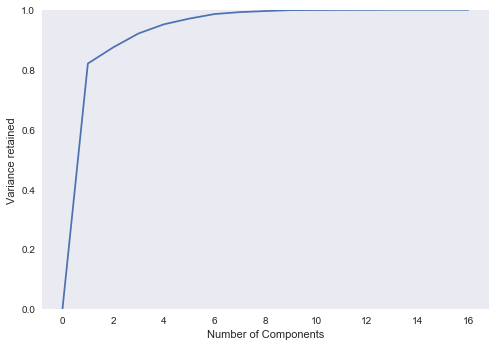

In [80]:
import matplotlib.pyplot as plt
import numpy as np
pca_signals = PCA().fit(X) 
evr = [0]+list(pca_signals.explained_variance_ratio_)
cumulative_explained = np.cumsum(evr) 
plt.plot(cumulative_explained);
plt.xlabel('Number of Components') 
plt.ylabel('Variance retained') 
plt.ylim(0,1) 
plt.grid()
plt.show()